# InSituPy demonstration - Cell type annotation with TACCO

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import pandas as pd
import tacco as tc
from insitupy.utils import generate_mock_reference
import scanpy as sc

## Previous steps

1. Download the example data for demonstration: [01_InSituPy_demo_download_data.ipynb](./01_InSituPy_demo_download_data.ipynb)
2. Register images from external stainings: [02_InSituPy_demo_register_images.ipynb](./02_InSituPy_demo_register_images.ipynb)
3. Visualize data with napari and do preprocessing steps: [03_InSituPy_demo_analyze.ipynb](./03_InSituPy_demo_analyze.ipynb)

At this point, the structure of the data should look like this:

    ```
    ./demo_dataset
    ├───cropped_processed
    ├───output-XETG00000__slide_id__sample_id
    │   ├───analysis
    │   │   ├───clustering
    │   │   ├───diffexp
    │   │   ├───pca
    │   │   ├───tsne
    │   │   └───umap
    │   └───cell_feature_matrix
    ├───registered_images
    ├───registration_qc
    └───unregistered_images
    ```


## Load Xenium data into `XeniumData` object

Now the Xenium data can be parsed by providing the data path to `XeniumData`

In [3]:
#insitupy_project = Path("../demo_dataset/demo_insitupy_project_cropped/")
insitupy_project = Path("../demo_dataset/demo_insitupy_project/")

In [4]:
xd = read_xenium(insitupy_project)

In [5]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Data path:	..\demo_dataset
Data folder:	demo_insitupy_project
Metadata file:	.ispy

In [6]:
xd.load_images()
xd.load_cells()

Loading images...
Loading cells...
	No alternative cells found...


In [7]:
xd.load_annotations()
xd.load_regions()

Loading annotations...
Loading regions...


In [8]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Data path:	..\demo_dataset
Data folder:	demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       demo:	4 annotations, 2 classes ('Positive','Negative') ✔
       demo2:	7 annotations, 4 classes ('Negative','Positive','Other','test_class') ✔
    ➤ regions
       demo_regions:	3 regions, 3 classes ('Regio

In [9]:
xd.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.
C:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:53: UserWarning: The provided color parameter has 167780 entries, while the data contains 14709 entries. Setting color to white.
  warnings.warn(
C:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:53: UserWarning: The provided color parameter has 167780 entries, while the data contains 14709 entries. Setting color to white.
  warnings.warn(


In [14]:
adata = xd.cells.matrix
adata.obs['annotation-demo'].notna().sum()

14709

In [16]:
xd.viewer.layers

[<Image layer 'nuclei' at 0x237811460d0>, <Image layer 'CD20' at 0x2376aa35d60>, <Image layer 'HER2' at 0x2375d38b730>, <Image layer 'HE' at 0x23781f01a00>, <Points layer 'main-APOBEC3A' at 0x2378048b8b0>]

In [15]:
xd.layers

AttributeError: 'InSituData' object has no attribute 'layers'

In [49]:
list(adata.obsm.keys())

['OT', 'X_pca', 'X_umap', 'spatial']

In [ ]:
type(data)

In [18]:
import pandas as pd
import numpy as np

In [26]:
type(adata.obsm['X_pca'])

numpy.ndarray

In [19]:
from insitupy.utils.palettes import data_to_rgba
import numpy as np

In [20]:
data_to_rgba([0, 1, np.nan])

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 1.        , 1.        , 0.        ]])

In [35]:
xd.show()

In [32]:
adata.obs['annotation-demo'].values.categories

Index(['Negative', 'Positive'], dtype='object')

In [23]:
np.unique(adata.obs['annotation-demo'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [37]:
adata = xd.cells.matrix

obsm_keys = list(adata.obsm.keys())
obsm_cats = []
k = obsm_keys[1]

for k in sorted(obsm_keys):
    data = adata.obsm[k]
    if isinstance(data, pd.DataFrame):
        for col in data.columns:
            obsm_cats.append(f"{k}-{col}")
    elif isinstance(data, np.ndarray):
        for i in range(data.shape[1]):
            obsm_cats.append(f"{k}-{i+1}")
    else:
        pass

In [42]:
adata.obsm['OT']['Adipocytes'].values

array([9.57514417e-22, 1.11631009e-22, 6.25637828e-16, ...,
       2.79865111e-18, 2.37017608e-19, 3.77648929e-15])

In [47]:
xd.show()

In [44]:
obsm_cats[0].split('-', maxsplit=1)[0]

['OT', 'Adipocytes']

In [36]:
sorted(obsm_keys)

['OT', 'X_pca', 'X_umap', 'spatial']

In [35]:
obsm_cats

['OT-Adipocytes',
 'OT-B cells',
 'OT-Breast cancer',
 'OT-Breast glandular cells',
 'OT-Breast myoepithelial cells',
 'OT-Dendritic cells',
 'OT-Endothelial cells',
 'OT-Epithelial cells',
 'OT-Fibroblasts',
 'OT-Immune cells',
 'OT-Macrophages',
 'OT-Mast cells',
 'OT-Monocytes',
 'OT-Myeloid cells',
 'OT-NK cells',
 'OT-Neutrophils',
 'OT-Plasma cells',
 'OT-Smooth muscle cells',
 'OT-T cells',
 'X_pca-1',
 'X_pca-2',
 'X_pca-3',
 'X_pca-4',
 'X_pca-5',
 'X_pca-6',
 'X_pca-7',
 'X_pca-8',
 'X_pca-9',
 'X_pca-10',
 'X_pca-11',
 'X_pca-12',
 'X_pca-13',
 'X_pca-14',
 'X_pca-15',
 'X_pca-16',
 'X_pca-17',
 'X_pca-18',
 'X_pca-19',
 'X_pca-20',
 'X_pca-21',
 'X_pca-22',
 'X_pca-23',
 'X_pca-24',
 'X_pca-25',
 'X_pca-26',
 'X_pca-27',
 'X_pca-28',
 'X_pca-29',
 'X_pca-30',
 'X_pca-31',
 'X_pca-32',
 'X_pca-33',
 'X_pca-34',
 'X_pca-35',
 'X_pca-36',
 'X_pca-37',
 'X_pca-38',
 'X_pca-39',
 'X_pca-40',
 'X_pca-41',
 'X_pca-42',
 'X_pca-43',
 'X_pca-44',
 'X_pca-45',
 'X_pca-46',
 'X_pca-47

In [28]:
data.shape[1]

50

In [24]:
obsm_cats

['OT-Adipocytes',
 'OT-B cells',
 'OT-Breast cancer',
 'OT-Breast glandular cells',
 'OT-Breast myoepithelial cells',
 'OT-Dendritic cells',
 'OT-Endothelial cells',
 'OT-Epithelial cells',
 'OT-Fibroblasts',
 'OT-Immune cells',
 'OT-Macrophages',
 'OT-Mast cells',
 'OT-Monocytes',
 'OT-Myeloid cells',
 'OT-NK cells',
 'OT-Neutrophils',
 'OT-Plasma cells',
 'OT-Smooth muscle cells',
 'OT-T cells']

In [17]:
adata

AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
    varm: 'OT', 'PCs', 'binned_expression'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [44]:
adata

AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
    varm: 'OT', 'PCs', 'binned_expression'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [33]:
None.append()

AttributeError: 'NoneType' object has no attribute 'append'

In [32]:
list(None)

TypeError: 'NoneType' object is not iterable

In [30]:
xd.viewer.window

In [30]:
xd.cells.matrix.obs["leiden"] = [str(elem) for elem in np.random.randint(low=0, high=5, size=len(xd.cells.matrix))]

In [10]:
l = xd.viewer.layers['main-leiden']

In [11]:
import napari

In [12]:
type(l)

napari.layers.points.points.Points

In [13]:
napari.layers.points.points.Points()

<Points layer 'Points' at 0x21a016b7f10>

In [15]:
isinstance(l, napari.layers.points.points.Points)

True

In [16]:
l = xd.viewer.layers["main-leiden"]

In [74]:


# use matplotlib to create RGB colors for the new values
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

class MplColorHelper:
  '''
  https://stackoverflow.com/questions/26108436/how-can-i-get-the-matplotlib-rgb-color-given-the-colormap-name-boundrynorm-an
  '''
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val, clip=True)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

# extract layer
#layer = xd.viewer.layers["main-ABCC11"]

# create new random values
import numpy as np
#new_values = np.random.rand(len(layer.properties['value']))*3
new_values = xd.cells.matrix.X[:, 0].toarray()
new_values = new_values.astype(np.float32)

scat = MplColorHelper("viridis", start_val=new_values.min(), stop_val=new_values.max())
scat.get_rgb(new_values)
#layer.face_color = scat.get_rgb(new_values)

# change name of layer
#layer.name = 'blubb'

array([[[0.212395, 0.359683, 0.55171 , 1.      ]],

       [[0.278012, 0.180367, 0.486697, 1.      ]],

       [[0.229739, 0.322361, 0.545706, 1.      ]],

       ...,

       [[0.267004, 0.004874, 0.329415, 1.      ]],

       [[0.267004, 0.004874, 0.329415, 1.      ]],

       [[0.267968, 0.223549, 0.512008, 1.      ]]])

# Create a function that converts both categorical and non-categorical data into a list of colors

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your list of categories
categories = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat5']

# Get the "tab20" colormap
cmap = plt.get_cmap('tab20')

# Create a dictionary to map each category to a color
category_colors = {category: mcolors.to_rgba(cmap(i % cmap.N)) for i, category in enumerate(categories)}

# Print the result
for category, color in category_colors.items():
    print(f"{category}: {color}")


cat1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
cat2: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)
cat3: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
cat4: (1.0, 0.7333333333333333, 0.47058823529411764, 1.0)
cat5: (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0)


In [12]:
import napari
import numpy as np

# Create a new viewer instance
viewer = napari.Viewer()

# Define 5 points with their coordinates
points = np.array([
    [100, 100],
    [200, 150],
    [300, 200],
    [400, 250],
    [500, 300]
])

# Define the RGB colors for each point
colors = [
    [1.0, 0.0, 0.0],  # Red
    [0.0, 1.0, 0.0],  # Green
    [0.0, 0.0, 1.0],  # Blue
    [1.0, 1.0, 0.0],  # Yellow
    [1.0, 0.0, 1.0]   # Magenta
]

# Add points to the viewer with the specified colors
points_layer = viewer.add_points(points, size=10, face_color=colors, edge_color='white')

# Start the napari viewer
napari.run()


In [72]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from pandas.api.types import is_numeric_dtype


def data_to_rgba(data):
    """
    Converts a list of categorical or continuous data into a list of RGBA values using matplotlib colormaps.

    Parameters:
    data (list): A list of categorical (str) or continuous (int/float) data.

    Returns:
    list: A list of tuples where each tuple represents an RGBA color.

    Examples:
    >>> categories = ['cat', 'dog', 'fish', 'cat', 'dog']
    >>> data_to_rgba(categories)
    [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)]

    >>> continuous_data = [0.1, 0.4, 0.6, 0.8, 1.0]
    >>> data_to_rgba(continuous_data)
    [(0.280267, 0.165693, 0.476498, 1.0), (0.229739, 0.322361, 0.545706, 1.0), (0.127568, 0.566949, 0.550556, 1.0), (0.369214, 0.788888, 0.382914, 1.0), (0.993248, 0.906157, 0.143936, 1.0)]
    """
    if is_numeric_dtype(data):
        # Handle continuous data
        norm = plt.Normalize(min(data), max(data))
        colormap = plt.get_cmap('viridis')
        return [colormap(norm(value)) for value in data]  # colormap already returns RGBA
    else:
        # Handle categorical data
        unique_categories = sorted(np.unique(data))
        colormap = plt.get_cmap('tab20')
        len_colormap = colormap.N
        category_to_rgba = {category: colormap(i % len_colormap) for i, category in enumerate(unique_categories)}
        return [category_to_rgba[category] for category in data]

# Example usage for categorical data:
categories = ['cat', 'dog', 'fish', 'cat', 'dog']
rgba_values_cat = data_to_rgba(categories)
print('Categorical Data RGBA:', rgba_values_cat)

# Example usage for continuous data:
continuous_data = [0.1, 0.4, 0.6, 0.8, 1.0]
rgba_values_cont = data_to_rgba(continuous_data)
print('Continuous Data RGBA:', rgba_values_cont)


Categorical Data RGBA: [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)]
Continuous Data RGBA: [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)]


In [24]:
from matplotlib import cm
import matplotlib as mpl
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from typing import Union
from insitupy.utils.palettes import CustomPalettes


def continuous_data_to_rgba(
    data,
    cmap: Union[str, ListedColormap],
    clip = False
    ):
    # get colormap if necessary
    if not isinstance(cmap, ListedColormap):
        cmap = plt.get_cmap(cmap)
    norm = mpl.colors.Normalize(vmin=np.min(data), vmax=np.max(data), clip=clip)
    scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)
    return scalarMap.to_rgba(data)

def categorical_data_to_rgba(data, cmap: Union[str, ListedColormap]):
    # Handle categorical data
    try:
        unique_categories = data.cat.categories
    except AttributeError:
        unique_categories = np.sort(np.unique(data))

    # get colormap if necessary
    if not isinstance(cmap, ListedColormap):
        cmap = plt.get_cmap(cmap)

    len_colormap = cmap.N
    category_to_rgba = {category: cmap(i % len_colormap) for i, category in enumerate(unique_categories)}
    return  np.array([category_to_rgba[category] for category in data])

def data_to_rgba(data,
                continuous_cmap: Union[str, ListedColormap] = "viridis",
                categorical_cmap: Union[str, ListedColormap] = None):
    if is_numeric_dtype(data):
        return continuous_data_to_rgba(data=data, cmap=continuous_cmap)
    else:
        if categorical_cmap is None:
            pal = CustomPalettes()
            categorical_cmap = pal.tab20_mod
        return categorical_data_to_rgba(data=data, cmap=categorical_cmap)

In [30]:
xd.cells.matrix.obs["leiden"] = [str(elem) for elem in np.random.randint(low=0, high=5, size=len(xd.cells.matrix))]

In [37]:
cat_data = xd.cells.matrix.obs["annotation-demo"]
con_data = xd.cells.matrix.X.toarray()[:, 0]

In [38]:
data_to_rgba(con_data, "viridis")

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       ...,
       [0.280255, 0.165693, 0.476498, 1.      ],
       [0.276022, 0.044167, 0.370164, 1.      ],
       [0.280255, 0.165693, 0.476498, 1.      ]])

In [41]:
d = {np.nan: "blubb"}

In [42]:
d[np.nan]

'blubb'

In [29]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Data path:	..\demo_dataset
Data folder:	demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 167780 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'annotation-demo', 'annotation-demo2'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
    ➤ annotations
       demo:	4 annotations, 2 classes ('Positive','Negative') ✔
       demo2:	7 annotations, 4 classes ('Negative','Positive','Other','test_class') ✔
    ➤ regions
       demo_regions:	3 regions, 3 classes ('Regio

In [30]:
xd.show()

In [39]:
data_to_rgba(cat_data, "tab20")

KeyError: nan

In [34]:
xd.show()

In [35]:
xd.cells.matrix.obs

,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area,annotation-demo,annotation-demo2,leiden
1,28,1,0,29,58.387031,26.642188,NaN,NaN,2
2,94,0,0,94,197.016719,42.130781,NaN,NaN,1
3,9,0,0,9,16.256250,12.688906,NaN,NaN,4
4,11,0,0,11,42.311406,10.069844,NaN,NaN,0
5,48,0,0,48,107.652500,37.479688,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
167776,229,1,0,230,220.452813,60.599688,NaN,NaN,1
167777,79,0,0,79,37.389375,25.242344,NaN,NaN,2
167778,397,0,0,397,287.058281,86.700000,NaN,NaN,2
167779,117,0,0,117,235.354375,25.197188,NaN,NaN,2


In [44]:
data_to_rgba(cat_data, pal.tab20_mod)

[(1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333

In [51]:
xd.show()

In [47]:
# generate point layer
points = xd.cells.matrix.obsm["spatial"]
cat_data = xd.cells.matrix.obs["leiden"]
con_data = xd.cells.matrix.X.toarray()[:, 0]

color_values = cat_data
point_size=6
colors = data_to_rgba(color_values)


layer_data = (
    points,
    {
        'name': "test",
        'properties': {
            "value": color_values,
            #"cell_name": point_names
            },
        'symbol': 'o',
        'size': point_size,
        'face_color': colors,
            # {
            # #"color_mode": color_mode, # workaround (see https://github.com/napari/napari/issues/6433)
            # #"colors": "value"
            # "colors": colors
            # },
        # 'face_color_cycle': color_cycle,
        # 'face_colormap': color_map,
        # 'face_contrast_limits': climits,
        # 'opacity': opacity,
        # 'visible': visible,
        # 'edge_width': edge_width,
        # 'edge_color': edge_color
        },
    'points'
    )

In [49]:
xd.viewer._add_layer_from_data(*layer_data)

[<Points layer 'test' at 0x2b0fd636820>]

In [26]:
type(pal.tab20_mod)

matplotlib.colors.ListedColormap

In [27]:
type(plt.get_cmap("viridis"))

matplotlib.colors.ListedColormap

In [111]:
import matplotlib as mpl

In [121]:
MplColorHelper(cmap_name="viridis", start_val=min(con_data), stop_val=max(con_data), clip=True).get_rgb(con_data)

array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.278012, 0.180367, 0.486697, 1.      ],
       [0.229739, 0.322361, 0.545706, 1.      ],
       ...,
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267968, 0.223549, 0.512008, 1.      ]])

In [136]:
cmap = plt.get_cmap("tab20")
norm = mpl.colors.Normalize(vmin=0, vmax=20)
scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)

In [139]:
scalarMap.to_rgba(2)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [127]:
MplColorHelper(cmap_name="viridis", start_val=min(cat_data), stop_val=max(cat_data),
               clip=True).get_rgb(cat_data)

TypeError: '>=' not supported between instances of 'str' and 'float'

In [123]:
cat_data

3980      1
3981      6
3982      6
3983      0
3984      1
         ..
95957     3
95958     5
95959     2
95960    12
95961     2
Name: leiden, Length: 21467, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [119]:
norm = plt.Normalize(min(con_data), max(con_data), clip=True)
cmap = plt.get_cmap('viridis')
%time [colormap(norm(value)) for value in con_data]  # colormap already returns RGBA

CPU times: total: 1.77 s
Wall time: 1.76 s


[(0.212395, 0.359683, 0.55171, 1.0),
 (0.278012, 0.180367, 0.486697, 1.0),
 (0.229739, 0.322361, 0.545706, 1.0),
 (0.212395, 0.359683, 0.55171, 1.0),
 (0.212395, 0.359683, 0.55171, 1.0),
 (0.19943, 0.387607, 0.554642, 1.0),
 (0.149039, 0.508051, 0.55725, 1.0),
 (0.223925, 0.334994, 0.548053, 1.0),
 (0.15627, 0.489624, 0.557936, 1.0),
 (0.220057, 0.343307, 0.549413, 1.0),
 (0.223925, 0.334994, 0.548053, 1.0),
 (0.267968, 0.223549, 0.512008, 1.0),
 (0.276194, 0.190074, 0.493001, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.250425, 0.27429, 0.533103, 1.0),
 (0.248629, 0.278775, 0.534556, 1.0),
 (0.275191, 0.194905, 0.496005, 1.0),
 (0.185556, 0.41857, 0.556753, 1.0),
 (0.15627, 0.489624, 0.557936, 1.0),
 (0.235526, 0.309527, 0.542944, 1.0),
 (0.225863, 0.330805, 0.547314, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.225863, 0.330805, 0.547314, 1.0),
 (0.133743, 0.548535, 0.553541, 1.0),
 (0.221989, 0.339161, 0.548752, 1.0),
 (0.267004, 0.004874, 

In [143]:
%time data_to_rgba(con_data)

CPU times: total: 1.41 s
Wall time: 1.46 s


[(0.212395, 0.359683, 0.55171, 1.0),
 (0.278012, 0.180367, 0.486697, 1.0),
 (0.229739, 0.322361, 0.545706, 1.0),
 (0.212395, 0.359683, 0.55171, 1.0),
 (0.212395, 0.359683, 0.55171, 1.0),
 (0.19943, 0.387607, 0.554642, 1.0),
 (0.149039, 0.508051, 0.55725, 1.0),
 (0.223925, 0.334994, 0.548053, 1.0),
 (0.15627, 0.489624, 0.557936, 1.0),
 (0.220057, 0.343307, 0.549413, 1.0),
 (0.223925, 0.334994, 0.548053, 1.0),
 (0.267968, 0.223549, 0.512008, 1.0),
 (0.276194, 0.190074, 0.493001, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.250425, 0.27429, 0.533103, 1.0),
 (0.248629, 0.278775, 0.534556, 1.0),
 (0.275191, 0.194905, 0.496005, 1.0),
 (0.185556, 0.41857, 0.556753, 1.0),
 (0.15627, 0.489624, 0.557936, 1.0),
 (0.235526, 0.309527, 0.542944, 1.0),
 (0.225863, 0.330805, 0.547314, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.225863, 0.330805, 0.547314, 1.0),
 (0.133743, 0.548535, 0.553541, 1.0),
 (0.221989, 0.339161, 0.548752, 1.0),
 (0.267004, 0.004874, 

In [141]:
%time data_to_rgba(cat_data)

CPU times: total: 0 ns
Wall time: 5.85 ms


[(0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8901960784313725, 0.4666666666666667,

In [68]:
cmap = plt.get_cmap("tab20")
norm = mpl.colors.Normalize(vmin=0, vmax=len(categories), clip=True)
scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)

In [71]:
norm

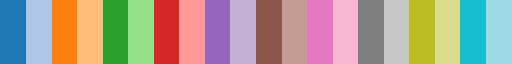

In [69]:
scalarMap.get_cmap()

In [70]:
norm

In [67]:
scalarMap.get_rgba(0)

AttributeError: 'ScalarMappable' object has no attribute 'get_rgba'

In [ ]:
scalarMap[]

In [61]:
cmap[categories]

TypeError: 'ListedColormap' object is not subscriptable

In [60]:
21 % cmap.N

1

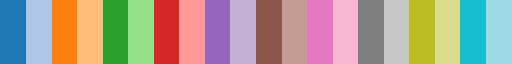

In [52]:
cmap

In [ ]:
from insitupy.utils

In [47]:
new_values = xd.cells.matrix.obs_vector("leiden")

In [48]:
new_values

['1', '6', '6', '0', '1', ..., '3', '5', '2', '12', '2']
Length: 21467
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [ ]:
Scalar

In [49]:
scat = MplColorHelper("tab20", start_val=new_values.min(), stop_val=new_values.max())
scat.get_rgb(new_values)
layer.face_color = scat.get_rgb(new_values)

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [35]:
scat.get_rgb(new_values)

array([[0.132444, 0.552216, 0.553018, 1.      ],
       [0.28291 , 0.105393, 0.426902, 1.      ],
       [0.259857, 0.745492, 0.444467, 1.      ],
       ...,
       [0.124395, 0.578002, 0.548287, 1.      ],
       [0.585678, 0.846661, 0.249897, 1.      ],
       [0.144759, 0.519093, 0.556572, 1.      ]])

In [31]:
import napari

[autoreload of insitupy._core._widgets failed: Traceback (most recent call last):
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "C:\Users\ge37voy\Github\InSituPy\insitupy\_core\_wid

In [32]:
isinstance(layer, napari.layers.Layer)

True

In [30]:
layer.face_contrast_limits

(0.0, 5.5599638175964365)

In [14]:
layer.properties['value'] = new_values

In [50]:
xd.viewer.layers["main-ABCC11"].properties['value'] = new_values

In [53]:
new_values

array([2.915265  , 2.606107  , 1.3177968 , ..., 1.3810582 , 0.66242796,
       2.4991353 ], dtype=float32)

In [58]:
layer.properties

{'value': array([3.0474548, 1.9264123, 2.7937813, ..., 1.       , 1.       ,
        2.1779678], dtype=float32),
 'cell_name': array(['3980', '3981', '3982', ..., '95959', '95960', '95961'],
       dtype=object)}

In [61]:
layer.properties['value'] = 'blubb'

In [63]:
layer.properties

{'value': array([3.0474548, 1.9264123, 2.7937813, ..., 1.       , 1.       ,
        2.1779678], dtype=float32),
 'cell_name': array(['3980', '3981', '3982', ..., '95959', '95960', '95961'],
       dtype=object)}

In [64]:
layer.properties['blubb'] = "test"

In [65]:
layer.properties

{'value': array([3.0474548, 1.9264123, 2.7937813, ..., 1.       , 1.       ,
        2.1779678], dtype=float32),
 'cell_name': array(['3980', '3981', '3982', ..., '95959', '95960', '95961'],
       dtype=object)}

In [66]:
type(layer.properties)

dict

In [57]:
layer.face_color = new_values

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided color parameter contained illegal values, resetting all color values to white.
  warnings.warn(


In [55]:
xd.viewer.layers["main-ABCC11"].data

array([[ 124.98353673,  590.01105089],
       [ 128.29803869,  565.54802599],
       [ 141.7058756 ,  580.80652208],
       ...,
       [1529.34021398, 1525.20902452],
       [1557.25781652, 1523.72692003],
       [1443.1727091 , 1523.01284532]])

In [54]:
xd.viewer.layers["main-ABCC11"].properties

{'value': array([3.0474548, 1.9264123, 2.7937813, ..., 1.       , 1.       ,
        2.1779678], dtype=float32),
 'cell_name': array(['3980', '3981', '3982', ..., '95959', '95960', '95961'],
       dtype=object)}

In [45]:
new_values

array([2.915265  , 2.606107  , 1.3177968 , ..., 1.3810582 , 0.66242796,
       2.4991353 ], dtype=float32)

In [46]:
layer.properties

{'value': array([3.0474548, 1.9264123, 2.7937813, ..., 1.       , 1.       ,
        2.1779678], dtype=float32),
 'cell_name': array(['3980', '3981', '3982', ..., '95959', '95960', '95961'],
       dtype=object)}

## TACCO annotation transfer using mock reference

For demonstration purposes here we use the Xenium panel that was used for the breast cancer demo dataset to generate a mock single-cell RNA-seq reference.

In [8]:
# load panel annotated by Jessica Pauli
panel = pd.read_csv("./demo_panel/Xenium_hBreast_v1_metadata.csv")

In [9]:
panel.head()

,Genes,Ensembl_ID,Num_Probesets,Codewords,Annotation
0,ABCC11,ENSG00000121270,7,1,Breast cancer
1,ACTA2,ENSG00000107796,8,1,Smooth muscle cells
2,ACTG2,ENSG00000163017,8,1,Breast myoepithelial cells
3,ADAM9,ENSG00000168615,8,1,Breast glandular cells
4,ADGRE5,ENSG00000123146,8,1,Dendritic cells


In [10]:
panel.Annotation.unique()

array(['Breast cancer', 'Smooth muscle cells',
       'Breast myoepithelial cells', 'Breast glandular cells',
       'Dendritic cells', 'Adipocytes', 'Macrophages',
       'Endothelial cells', 'B cells', 'Epithelial cells', 'Fibroblasts',
       'T cells', 'Monocytes', 'NK cells', 'Neutrophils', 'Mast cells',
       'Myeloid cells', 'Immune cells', 'Plasma cells'], dtype=object)

In [11]:
reference = generate_mock_reference(panel, annotation_column="Annotation", gene_column="Genes")

In [12]:
reference

AnnData object with n_obs × n_vars = 19 × 280
    obs: 'Annotation'

In [13]:
xd.cells.matrix

AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs', 'binned_expression'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [14]:
# set counts location
xd.cells.matrix.uns["counts_location"] = ['layer', 'counts']

In [15]:
# This is the annotation step. OT is our own annotation method, but theres multiple like rctd implemented in Tacco
# Theres also multiple parameters one could adjust, i ran everything with default
tc.tl.annotate(adata=xd.cells.matrix,
               reference=reference,
               annotation_key='Annotation',
               counts_location=None,  # if None it looks in `.uns["counts_location"]`
               result_key='OT',
               assume_valid_counts=False
               )

Starting preprocessing
Annotation profiles were not found in `reference.varm["Annotation"]`. Constructing reference profiles with `tacco.preprocessing.construct_reference_profiles` and default arguments...
Finished preprocessing in 0.11 seconds.
Starting annotation of data with shape (21467, 280) and a reference of shape (19, 280) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=Annotation, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=4, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  15.171710714285714 30.59616835531907
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.09876543209876543
Finished annotation in 3.56 seconds.


AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'counts_location'
    obsm: 'X_pca', 'X_umap', 'spatial', 'OT'
    varm: 'PCs', 'binned_expression', 'OT'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [16]:
# Tacco annotate returns non-absolute cell type percentages for each cell, since in other spatial methods
# cells can overlap on the measurement spots. This is to get the absolute annotation for each cell
tc.utils.get_maximum_annotation(xd.cells.matrix, 'OT', result_key='cell_type')

AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'counts_location'
    obsm: 'X_pca', 'X_umap', 'spatial', 'OT'
    varm: 'PCs', 'binned_expression', 'OT'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [17]:
xd.cells.matrix

AnnData object with n_obs × n_vars = 21467 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'counts_location'
    obsm: 'X_pca', 'X_umap', 'spatial', 'OT'
    varm: 'PCs', 'binned_expression', 'OT'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


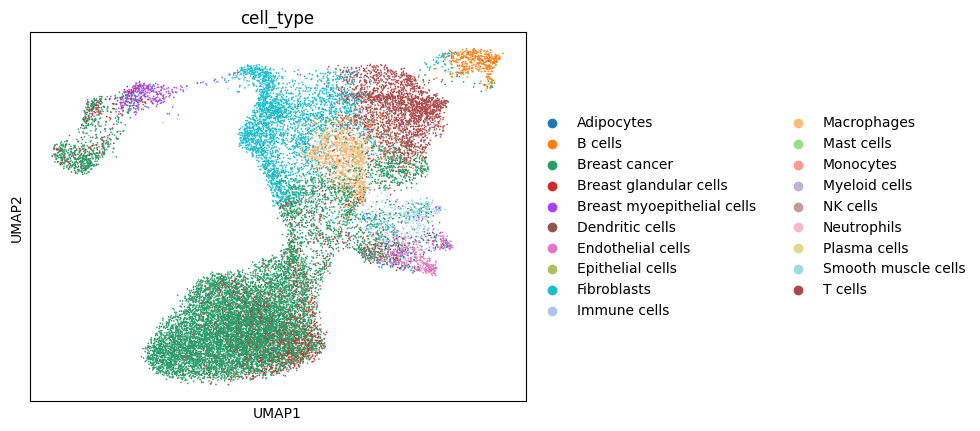

In [18]:
sc.pl.umap(xd.cells.matrix, color="cell_type")

## Visualization in napari

The cell type annotation can be selected in the "Show data" widget on the right under "observation" and then be displayed with the "Add" button:

<left><img src="./demo_screenshots/napari_cell_annotation_marked.jpg" width="1000"/></left>

When the the correct layer is selected in the layer list on the left, it is possible to hover with the mouse onto a cell and see the annotation of this cell on the bottom left under "value".



In [19]:
xd.show()

## Save results

In [20]:
xd.save()

Updating project in c:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project_cropped
	Updating cells...
Saved.
Reloading following modalities: cells,images
Loading cells...
	No alternative cells found...
Loading images...
